# Modelling and evaluation

Explantion of what we are doing

### Importing modules

In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.dummy import DummyClassifier

from imblearn.over_sampling import SMOTE 


# Models for classification
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# GridsearchCV and Cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegressionCV
from sklearn.pipeline import Pipeline

#Scaling for KNN
from sklearn.preprocessing import MinMaxScaler

#XGBoost
import xgboost as xgb
from xgboost import XGBClassifier

# Evaluation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt



### Importing data

In [3]:
df = pd.read_csv('PreProcessedData.csv', sep=",")

df.info()

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534147 entries, 0 to 534146
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         534147 non-null  int64  
 1   State              534147 non-null  int64  
 2   Zip                534147 non-null  int64  
 3   NAICS              534147 non-null  int64  
 4   ApprovalFY         534147 non-null  int64  
 5   Term               534147 non-null  int64  
 6   NoEmp              534147 non-null  int64  
 7   NewExist           534147 non-null  int64  
 8   CreateJob          534147 non-null  int64  
 9   RetainedJob        534147 non-null  int64  
 10  FranchiseCode      534147 non-null  int64  
 11  UrbanRural         534147 non-null  int64  
 12  LowDoc             534147 non-null  int64  
 13  DisbursementGross  534147 non-null  float64
 14  MIS_Status         534147 non-null  int64  
 15  GrAppv             534147 non-null  float64
 16  Ra

,Unnamed: 0,State,Zip,NAICS,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,LowDoc,DisbursementGross,MIS_Status,GrAppv,Ratio
0,12,27,27502,44,2006,162,2,2,0,0,1,1,0,253400.0,1,253400.0,0.75
1,24,2,72223,72,2006,126,7,1,0,0,0,1,0,137300.0,1,137300.0,0.85
2,28,4,93010,61,2006,83,18,2,5,23,0,1,0,438541.0,1,100000.0,0.50
3,30,9,33186,23,2006,84,4,1,0,4,0,1,0,51440.0,1,35000.0,0.50
4,32,18,70130,53,2006,60,3,1,0,0,0,1,0,50000.0,1,50000.0,0.85


### Establish baseline

In [4]:
X = df[['State','Zip','NAICS','Term','NoEmp','NewExist','CreateJob','RetainedJob','FranchiseCode','UrbanRural','LowDoc','DisbursementGross','GrAppv','Ratio']]

y = df['MIS_Status']

X.columns

Index(['State', 'Zip', 'NAICS', 'Term', 'NoEmp', 'NewExist', 'CreateJob',
       'RetainedJob', 'FranchiseCode', 'UrbanRural', 'LowDoc',
       'DisbursementGross', 'GrAppv', 'Ratio'],
      dtype='object')

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

print(X_train.shape, y_train.shape,X_test.shape, y_test.shape)

(400610, 14) (400610,) (133537, 14) (133537,)


In [6]:
sum(y)/len(y)*100

75.59005292550552

In [33]:
#EVT. CUT DENNE DEL UD HVIS DET IKKE GIVER MENING
dummy = DummyClassifier()
dummy.fit(X_train, y_train)
dummy_y_pred = dummy.predict(X_test)

print("Score: {:.3f}".format(dummy.score(X_train, y_train)))
print("Score: {:.3f}".format(dummy.score(X_test, y_test)))

Score: 0.756
Score: 0.756


In [8]:
#EVT. CONFUSION MATRIX PÅ BAGGRUND AF DUMMY
#cm = confusion_matrix(y_test, dum_y_pred)
#print(cm)

Evaluation and confusion matrix

              precision    recall  f1-score   support

           0       0.00      0.00      0.00    101201
           1       0.50      1.00      0.67    100680

    accuracy                           0.50    201881
   macro avg       0.25      0.50      0.33    201881
weighted avg       0.25      0.50      0.33    201881

[[     0 101201]
 [     0 100680]]


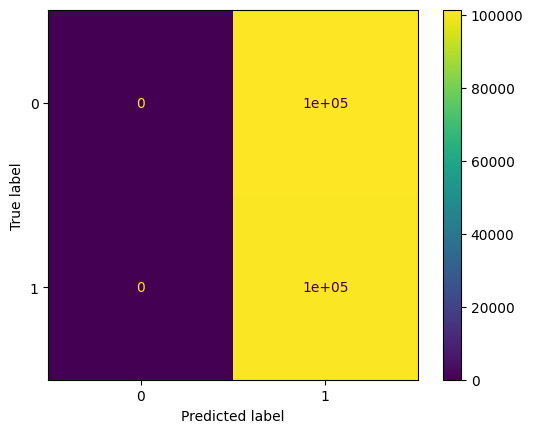

In [12]:
# https://stackoverflow.com/questions/66022943/how-to-fix-this-classification-report-warning
print(classification_report(y_test, dummy_y_pred, zero_division=0)) #LÆS KORT OP PÅ zerodivision


cm_dummy = confusion_matrix(y_test, dummy_y_pred)
print(cm_dummy)

cm_graph = ConfusionMatrixDisplay(confusion_matrix=cm_dummy, display_labels=dummy.classes_)
cm_graph.plot()

# CLASSIFIERS (MODELS)

Explanation of process and procedure

### Logistic Regression

In [13]:
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

#For evaluating later
LogReg_y_pred = LogReg.predict(X_test)

#Scores
print("Score: {:.3f}".format(LogReg.score(X_train, y_train)))
print("Score: {:.3f}".format(LogReg.score(X_test, y_test)))

Score: 0.748
Score: 0.746


In [14]:
#Coefficient (FORKLARING--> Excercise 4 bottom)
coefficient = LogReg.coef_
print(coefficient)

odds = np.exp(coefficient)
odds

[[-7.05573732e-03 -1.14832259e-05 -2.10015794e-02  2.91845995e-02
   2.35092804e-03 -2.55596086e-04 -7.27573572e-05  5.64189281e-04
   4.95476302e-05 -2.17059012e-04  1.06183085e-04  8.82277275e-07
  -2.72085933e-06 -2.23824461e-04]]


array([[0.9929691 , 0.99998852, 0.97921742, 1.02961464, 1.00235369,
        0.99974444, 0.99992725, 1.00056435, 1.00004955, 0.99978296,
        1.00010619, 1.00000088, 0.99999728, 0.9997762 ]])

GridSearchCV

In [15]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
LogReg_G = LogisticRegression() 

  
param_grid =  {
    'C': [0.01, 0.1, 1, 10, 100], # LÆS OP PÅ DISSE PARAMETERS
    'max_iter':[1000],
    'random_state':[42]
}


LogReg_Grid = GridSearchCV(LogReg_G, param_grid, verbose=3) #"cv" parameter default = 5


LogReg_Grid.fit(X_train, y_train)
LogReg_Grid.best_score_, LogReg_Grid.best_params_, LogReg_Grid.best_estimator_ 

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END C=0.01, max_iter=1000, random_state=42;, score=0.746 total time=   2.7s
[CV 2/5] END C=0.01, max_iter=1000, random_state=42;, score=0.749 total time=   2.5s
[CV 3/5] END C=0.01, max_iter=1000, random_state=42;, score=0.746 total time=   2.6s
[CV 4/5] END C=0.01, max_iter=1000, random_state=42;, score=0.748 total time=   2.5s
[CV 5/5] END C=0.01, max_iter=1000, random_state=42;, score=0.748 total time=   2.2s
[CV 1/5] END C=0.1, max_iter=1000, random_state=42;, score=0.746 total time=   2.4s
[CV 2/5] END C=0.1, max_iter=1000, random_state=42;, score=0.749 total time=   2.4s
[CV 3/5] END C=0.1, max_iter=1000, random_state=42;, score=0.746 total time=   2.2s
[CV 4/5] END C=0.1, max_iter=1000, random_state=42;, score=0.748 total time=   2.4s
[CV 5/5] END C=0.1, max_iter=1000, random_state=42;, score=0.748 total time=   2.1s
[CV 1/5] END C=1, max_iter=1000, random_state=42;, score=0.746 total time=   2.7s
[CV 2/5] END 

(0.747496464379862,
 {'C': 1, 'max_iter': 1000, 'random_state': 42},
 LogisticRegression(C=1, max_iter=1000, random_state=42))

In [16]:
LogReg_Grid_y_pred = LogReg_Grid.predict(X_test)

print("Score: {:.3f}".format(LogReg_Grid.score(X_train, y_train)))
print("Score: {:.3f}".format(LogReg_Grid.score(X_test, y_test)))

Score: 0.748
Score: 0.746


Cross Validation

In [17]:
LogReg_CV = LogisticRegressionCV(
    cv=10, #CHECK HER
    random_state=42,
    max_iter=1000)

LogReg_CV.fit(X_train, y_train)

# For evaluation
LogReg_CV_y_pred = LogReg_CV.predict(X_test)

print(LogReg_CV.C_)


print("Score: {:.3f}".format(LogReg_CV.score(X_train, y_train)))
print("Score: {:.3f}".format(LogReg_CV.score(X_test, y_test)))

[21.5443469]
Score: 0.748
Score: 0.747


Evaluation and confusion matrix

In [18]:
# Normal LogReg
print(classification_report(y_test, LogReg_y_pred))

cm_LogReg = confusion_matrix(y_test, LogReg_y_pred)
print(cm_LogReg)

              precision    recall  f1-score   support

           0       0.75      0.75      0.75    101201
           1       0.75      0.74      0.75    100680

    accuracy                           0.75    201881
   macro avg       0.75      0.75      0.75    201881
weighted avg       0.75      0.75      0.75    201881

[[75744 25457]
 [25772 74908]]


In [19]:
# LogRegGrid
print(classification_report(y_test, LogReg_Grid_y_pred))

cm_LogReg_Grid = confusion_matrix(y_test, LogReg_Grid_y_pred)
print(cm_LogReg_Grid)

              precision    recall  f1-score   support

           0       0.75      0.75      0.75    101201
           1       0.75      0.74      0.75    100680

    accuracy                           0.75    201881
   macro avg       0.75      0.75      0.75    201881
weighted avg       0.75      0.75      0.75    201881

[[75744 25457]
 [25772 74908]]


In [20]:
# LogRegCV
print(classification_report(y_test, LogReg_CV_y_pred))

cm_LogReg_CV = confusion_matrix(y_test, LogReg_CV_y_pred)
print(cm_LogReg_CV)

              precision    recall  f1-score   support

           0       0.75      0.75      0.75    101201
           1       0.75      0.75      0.75    100680

    accuracy                           0.75    201881
   macro avg       0.75      0.75      0.75    201881
weighted avg       0.75      0.75      0.75    201881

[[75699 25502]
 [25539 75141]]


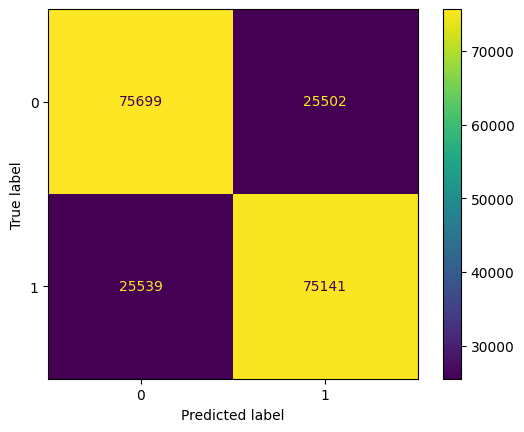

In [21]:
cm_graph_LogReg_CV = ConfusionMatrixDisplay(confusion_matrix=cm_LogReg_CV, display_labels=LogReg_CV.classes_)
cm_graph_LogReg_CV.plot()

### K-Nearest Neighbour

In [34]:
# 
knc = KNeighborsClassifier()
knc.fit(X_train, y_train)
knc_y_pred = knc.predict(X_test)
print("Score: {:.3f}".format(knc.score(X_train, y_train)))
print("Score: {:.3f}".format(knc.score(X_test, y_test)))

Score: 0.828
Score: 0.762


In [36]:
# LÆS OP PÅ SCALING
scaler = MinMaxScaler()

X_trainS = scaler.fit_transform(X_train)
X_testS = scaler.fit_transform(X_test)

In [24]:
knn_pipeline = Pipeline([('mms', MinMaxScaler()), ('knn', KNeighborsClassifier())])

param_grid = [{'knn__n_neighbors': [5, 50, 100], 'knn__weights': ['uniform', 'distance']}]

Grid_knn = GridSearchCV(knn_pipeline,
                      param_grid,
                      scoring='accuracy',
                      cv=5)

Grid_knn.fit(X_trainS, y_train)
Grid_knn.best_params_

{'knn__n_neighbors': 5, 'knn__weights': 'distance'}

{'knn__n_neighbors': 5, 'knn__weights': 'distance'}

In [37]:
knc_Grid = KNeighborsClassifier(n_neighbors=5, weights='distance')
knc_Grid.fit(X_trainS, y_train)
knc_Grid_y_pred = knc_Grid.predict(X_testS)
print("Score: {:.3f}".format(knc_Grid.score(X_trainS, y_train)))
print("Score: {:.3f}".format(knc_Grid.score(X_testS, y_test)))

Score: 1.000
Score: 0.618


Evaluation and confusion matrix

              precision    recall  f1-score   support

           0       0.36      0.76      0.49     32586
           1       0.88      0.57      0.69    100951

    accuracy                           0.62    133537
   macro avg       0.62      0.67      0.59    133537
weighted avg       0.76      0.62      0.64    133537

[[24889  7697]
 [43301 57650]]


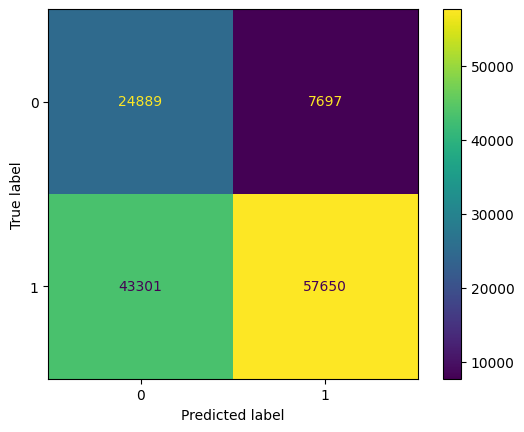

In [38]:
# KNN w. Grid search and scaling
print(classification_report(y_test, knc_Grid_y_pred))

cm_knc = confusion_matrix(y_test, knc_Grid_y_pred)
print(cm_knc)

cm_graph_knc = ConfusionMatrixDisplay(confusion_matrix=cm_knc, display_labels=knc_Grid.classes_)
cm_graph_knc.plot()

### Decision Tree

In [27]:
dtree = tree.DecisionTreeClassifier(max_depth=4, random_state=42, min_samples_leaf=2500) 
dtree.fit(X_train, y_train)

dtree_y_pred = dtree.predict(X_test)

print("Score: {:.3f}".format(dtree.score(X_train, y_train)))
print("Score: {:.3f}".format(dtree.score(X_test, y_test)))

Score: 0.874
Score: 0.874


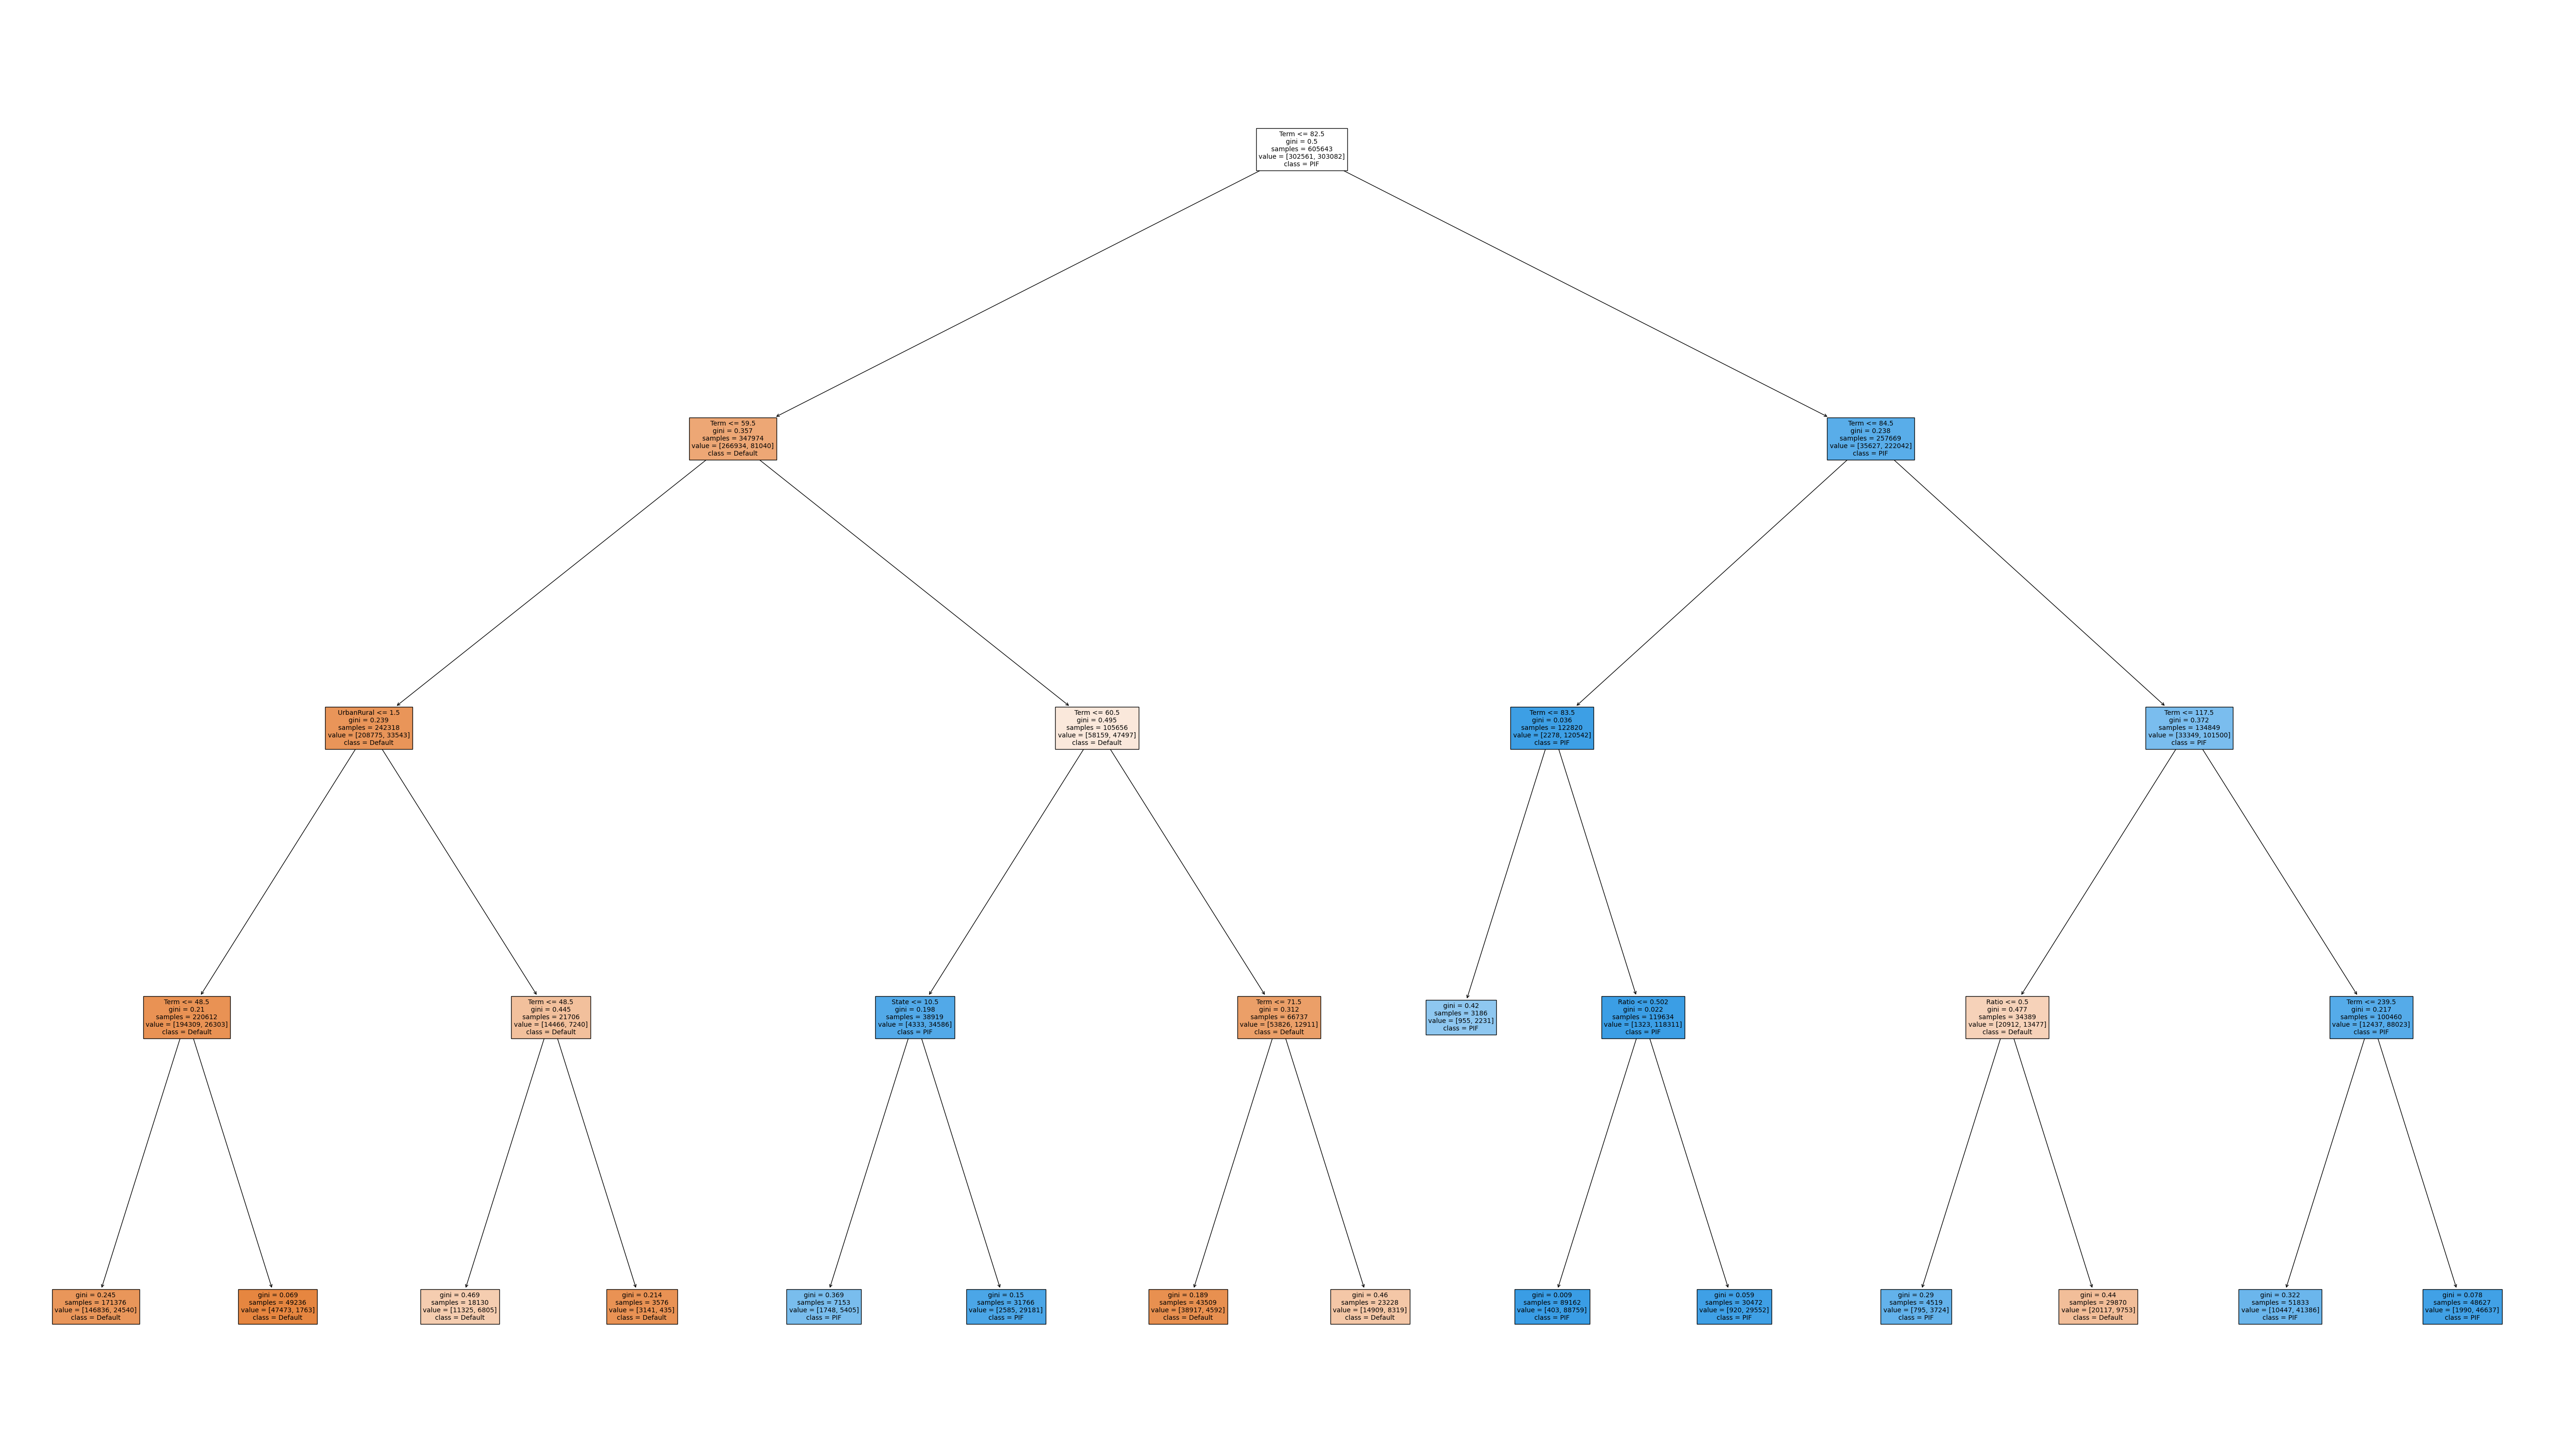

In [28]:
plt.figure(figsize=(70,40))  # set plot size (denoted in inches)
tree.plot_tree(dtree,
               class_names=["Default", "PIF"],
               feature_names=list(X.columns), # label features with the column names from X
               filled=True, # color nodes to indicate majority class
               fontsize=10) 
plt.savefig('DecisionTree.png', bbox_inches='tight') # Saving as png

In [29]:
# https://mkdtycl97.medium.com/tree-type-prediction-with-xgboost-classifier-c19ed4ed3686
xgb = XGBClassifier()

param = {
    'n_estimators' : [100, 500],
    'subsample': [0.8, 1],
    'max_depth': [4, 5, 6],  
    'learning_rate':[0.1, 0.3]} 

xgb_CV = GridSearchCV(xgb, param, cv=2, n_jobs=1, verbose=3)

xgb_CV.fit(X_train, y_train)

xgb_CV.best_params_

Fitting 2 folds for each of 24 candidates, totalling 48 fits
[CV 1/2] END learning_rate=0.1, max_depth=4, n_estimators=100, subsample=0.8;, score=0.923 total time=   2.2s
[CV 2/2] END learning_rate=0.1, max_depth=4, n_estimators=100, subsample=0.8;, score=0.923 total time=   2.0s
[CV 1/2] END learning_rate=0.1, max_depth=4, n_estimators=100, subsample=1;, score=0.923 total time=   1.5s
[CV 2/2] END learning_rate=0.1, max_depth=4, n_estimators=100, subsample=1;, score=0.924 total time=   1.5s
[CV 1/2] END learning_rate=0.1, max_depth=4, n_estimators=500, subsample=0.8;, score=0.943 total time=   9.4s
[CV 2/2] END learning_rate=0.1, max_depth=4, n_estimators=500, subsample=0.8;, score=0.942 total time=   7.9s
[CV 1/2] END learning_rate=0.1, max_depth=4, n_estimators=500, subsample=1;, score=0.943 total time=   4.7s
[CV 2/2] END learning_rate=0.1, max_depth=4, n_estimators=500, subsample=1;, score=0.942 total time=   4.7s
[CV 1/2] END learning_rate=0.1, max_depth=5, n_estimators=100, subs

{'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 500, 'subsample': 1}

In [30]:
xgb_CV_tuned = XGBClassifier(n_estimators=500, subsample=0.8, max_depth=4, learning_rate=0.1)

xgb_CV_tuned.fit(X_train, y_train)

xgb_CV_y_pred = xgb_CV_tuned.predict(X_test)

print("Score: {:.3f}".format(xgb_CV.score(X_train, y_train)))
print("Score: {:.3f}".format(xgb_CV.score(X_test, y_test)))

Score: 0.956
Score: 0.950


Evaluation and confusion matrix

              precision    recall  f1-score   support

           0       0.94      0.95      0.94    101201
           1       0.95      0.94      0.94    100680

    accuracy                           0.94    201881
   macro avg       0.94      0.94      0.94    201881
weighted avg       0.94      0.94      0.94    201881

[[95856  5345]
 [ 6076 94604]]


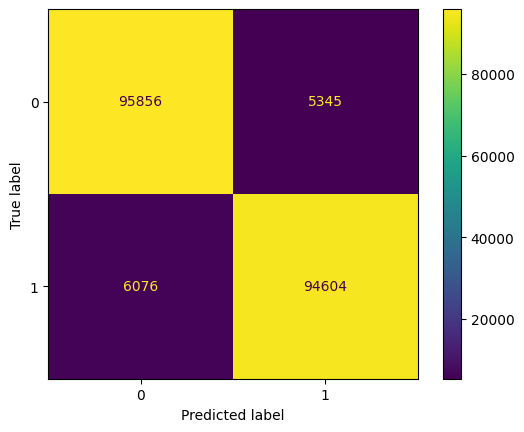

In [31]:
# Normal dtree
print(classification_report(y_test, xgb_CV_y_pred))

cm_xgb_CV = confusion_matrix(y_test, xgb_CV_y_pred)
print(cm_xgb_CV)

cm_graph_XGB = ConfusionMatrixDisplay(confusion_matrix=cm_xgb_CV, display_labels=xgb_CV.classes_)
cm_graph_XGB.plot()